### 1. Libraries

In [16]:
import csv
import random
import warnings

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 10)
pd.set_option("display.max_columns",None)
pd.options.mode.chained_assignment = None  # default='warn'

sns.set(style='ticks', color_codes=True, font_scale=1.2)
sns.set_style('darkgrid', {'legend.frameon':True})

%matplotlib inline

### 2. Parameters

In [2]:
N_features = 6
N_years = [2013, 2014, 2015]

### 3. Data preparation

In [3]:
df = pd.read_excel('laurel-world-happiness-report-data/online-data-chapter-2-whr-2017.xlsx').drop('WP5 Country',axis=1)
display(df)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072,-1.962724,-1.665877,1.774662,0.476600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545,-2.082451,-1.647945,1.722688,0.391362,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357,-2.015700,-1.630097,1.878622,0.394803,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386,-1.943686,-1.620443,1.785360,0.465942,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440,-1.855898,-1.435541,1.798283,0.475367,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,0.407084,-1.117682,-1.477044,1.853195,0.373997,NaN,NaN,0.487203,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1416,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,0.527755,-1.031373,-1.471021,1.964805,0.418918,NaN,NaN,0.555439,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209,-0.962947,-1.468772,2.079248,0.496899,NaN,NaN,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012,NaN,NaN,2.198865,0.593776,NaN,NaN,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


#### Checking for NULLs:

In [4]:
# 159 countries in total
pd.set_option('display.max_rows', None)
display(df.isnull().sum())
pd.set_option('display.max_rows', 10)

for col in df:
    if df[col].isnull().sum() > 200:
        df.drop(col,axis=1,inplace=True)

pd.set_option('display.max_rows', None)
display(df.isnull().sum())
pd.set_option('display.max_rows', 10)

country                                                        0
year                                                           0
Life Ladder                                                    0
Log GDP per capita                                            35
Social support                                                12
Healthy life expectancy at birth                               9
Freedom to make life choices                                  34
Generosity                                                    92
Perceptions of corruption                                     84
Positive affect                                               17
Negative affect                                               11
Confidence in national government                            195
Democratic Quality                                           292
Delivery Quality                                             291
Standard deviation of ladder by country-year                   0
Standard deviation/Mean o

country                                                0
year                                                   0
Life Ladder                                            0
Log GDP per capita                                    35
Social support                                        12
Healthy life expectancy at birth                       9
Freedom to make life choices                          34
Generosity                                            92
Perceptions of corruption                             84
Positive affect                                       17
Negative affect                                       11
Confidence in national government                    195
Standard deviation of ladder by country-year           0
Standard deviation/Mean of ladder by country-year      0
GINI index (World Bank estimate), average 2000-13    174
dtype: int64

#### Scaling data with MinMaxScaler:

In [5]:
df_d = df[df.columns[:N_features + 3]]
df_d.dropna(axis=0,inplace=True)

df_2014 = df_d[df_d.groupby('country')['year'].apply(lambda x: x == N_years[1])]

df_2014.drop(['Life Ladder', 'country', 'year'], axis=1, inplace=True)
df_2014.reset_index(drop=True, inplace=True)

display(df_2014)

df_2014_std = MinMaxScaler().fit_transform(df_2014)
df_2014_std = pd.DataFrame(df_2014_std.round(3), columns=df_2014.columns)
display(df_2014_std)

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.519704,0.525568,49.305813,0.508514,0.118934,0.871242
1,9.222470,0.625587,68.364594,0.734648,-0.025123,0.882704
2,8.847354,0.754615,45.092995,0.374542,-0.164495,0.834076
3,8.948806,0.738764,65.209778,0.506487,-0.202479,0.920390
4,10.675159,0.923799,72.341438,0.922932,0.303388,0.442021
...,...,...,...,...,...,...
123,8.578641,0.952406,60.415661,0.954481,0.060180,0.536461
124,9.727306,0.903956,64.468277,0.569962,-0.226221,0.826535
125,8.286581,0.638252,53.846603,0.663909,-0.174245,0.885429
126,8.194842,0.706223,51.619392,0.811825,-0.018351,0.808841


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.196,0.155,0.189,0.237,0.495,0.883
1,0.547,0.346,0.774,0.622,0.323,0.896
2,0.470,0.593,0.060,0.009,0.156,0.842
3,0.491,0.563,0.677,0.234,0.111,0.938
4,0.846,0.916,0.896,0.943,0.715,0.405
...,...,...,...,...,...,...
123,0.414,0.971,0.530,0.997,0.424,0.510
124,0.651,0.878,0.654,0.342,0.082,0.833
125,0.354,0.370,0.329,0.502,0.144,0.899
126,0.335,0.500,0.260,0.754,0.331,0.814


### 4. Cluster analysis

In [7]:
def pairplot_cluster(df, labels, centroids, iter, idx, crit):
    ncol, nrow = N_features, N_features
    fig = plt.figure(figsize=(ncol * 5, nrow * 5))
    axs = []
    for i in range(df.shape[1]**2):
        axs.append(fig.add_subplot(ncol, nrow, i + 1))

    k = 0
    for i, feature_y in enumerate(df.columns):
        for j, feature_x in enumerate(df.columns):
            if j == i:
                sns.distplot(df[feature_x],
                             kde_kws=dict(shade=True),
                             color='b',
                             axlabel=feature_x, ax=axs[k])
            else:
                axs[k].scatter(df[feature_x], df[feature_y],
                               s=75, alpha=.6, edgecolor='k', linewidth=.5,
                               c=labels, cmap=plt.cm.get_cmap('Spectral'))
                axs[k].scatter(centroids[:,j], centroids[:,i],
                               s=100, linewidth=1, edgecolor='black',
                               c=np.unique(labels), cmap=plt.cm.get_cmap('Spectral'),
                               marker='X')
                axs[k].set_xlabel(feature_x)
                axs[k].set_ylabel(feature_y, labelpad=0)
            k += 1
    fig.suptitle('Number of clusters = {}, model №{}, criterion = {:.3f}'.format(idx, iter, crit),
                 y=1.01, verticalalignment='top', fontsize=26);

#### Iterating through 3 cluster sizes (3, 5, 7):

In [8]:
kmeans, crit  = [], []
for j in [5, 7]:
    for i in range(0, 10):
        kmeans_model = KMeans(n_clusters=j, random_state=np.random.randint(0, 100))    
        kmeans_model.fit_predict(df_2014_std)
        crit.append(kmeans_model.inertia_)
        kmeans.append(kmeans_model)
        
best_iter = dict([(5, np.argmin(crit[:10], axis=0)),
                  (7, np.argmin(crit[10:], axis=0) + 10)])
best_models = dict([(5, kmeans[best_iter[5]]), 
                    (7, kmeans[best_iter[7]])])

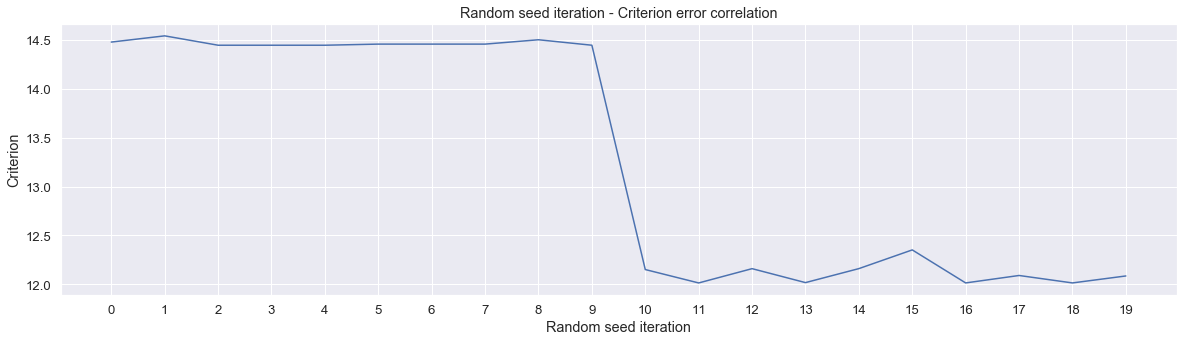

In [9]:
fig = plt.figure(figsize=(20, 5))
plt.title('Random seed iteration - Criterion error correlation')
plt.xlabel("Random seed iteration")
plt.ylabel("Criterion")
plt.plot(range(0, len(crit)), crit)
plt.xticks(range(20));
plt.savefig('./img/inertia_curve.png', bbox_inches='tight', pad_inches=1);

#### The best models according to the criterion:

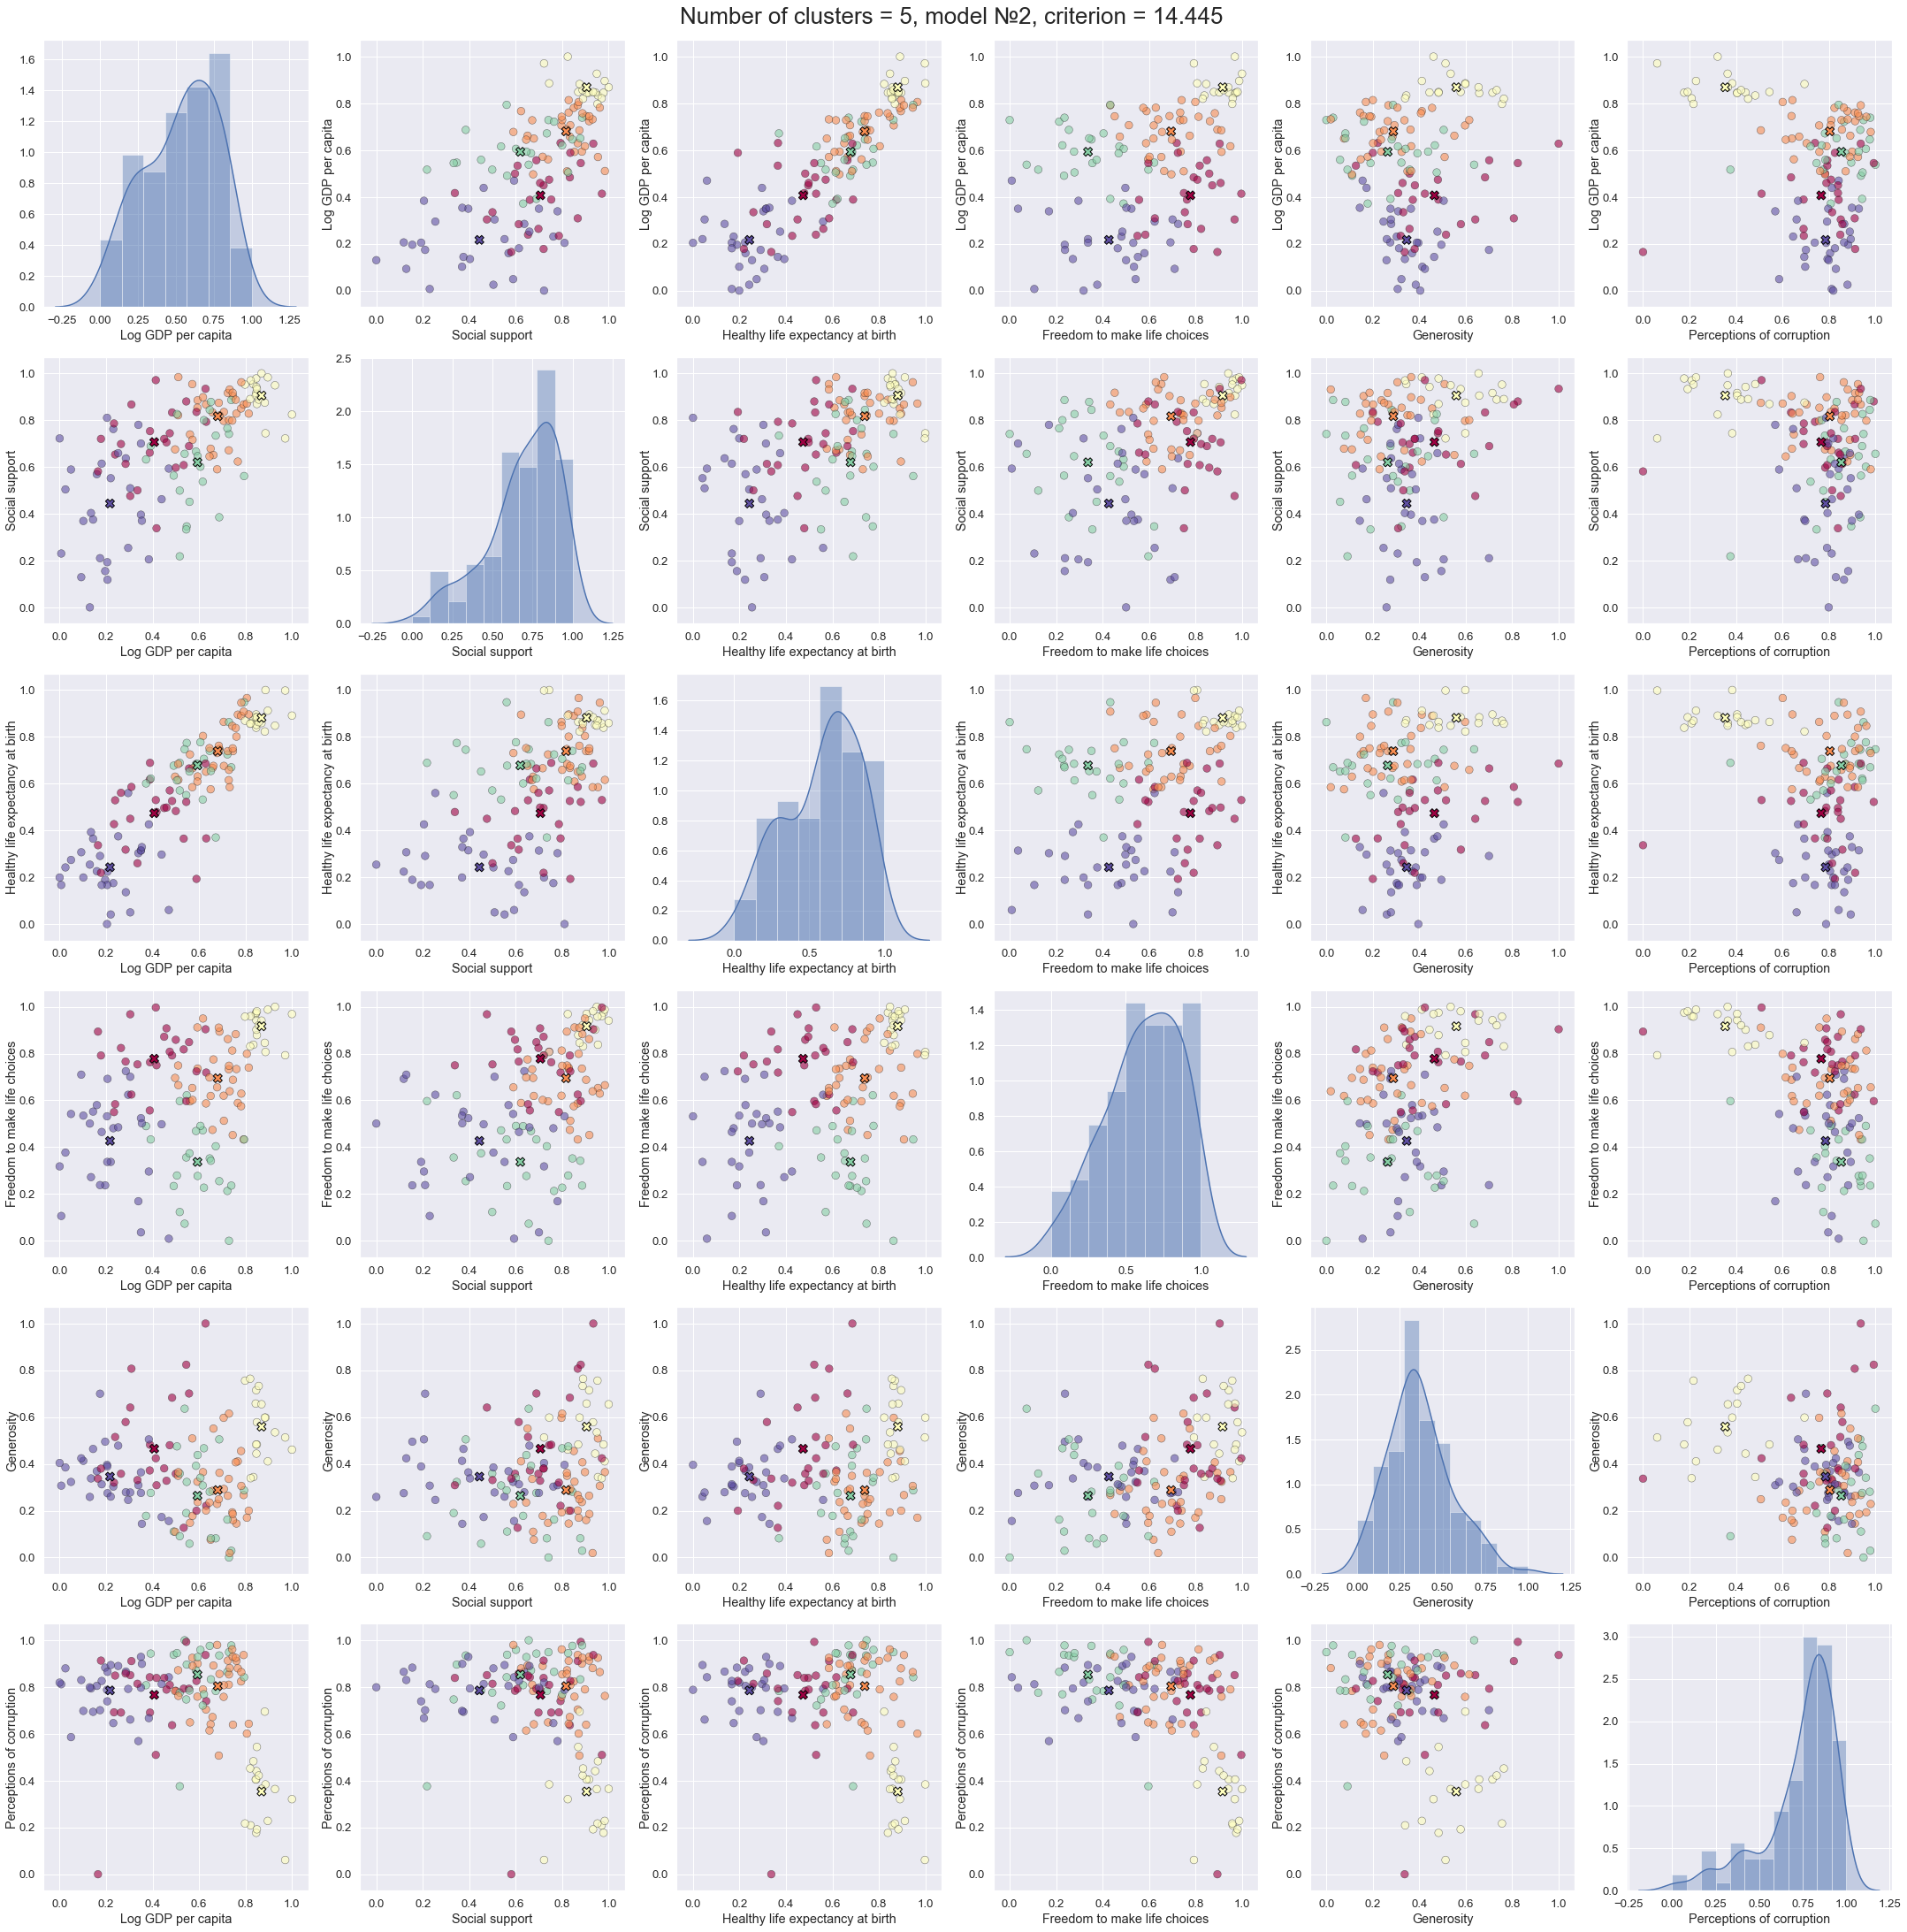

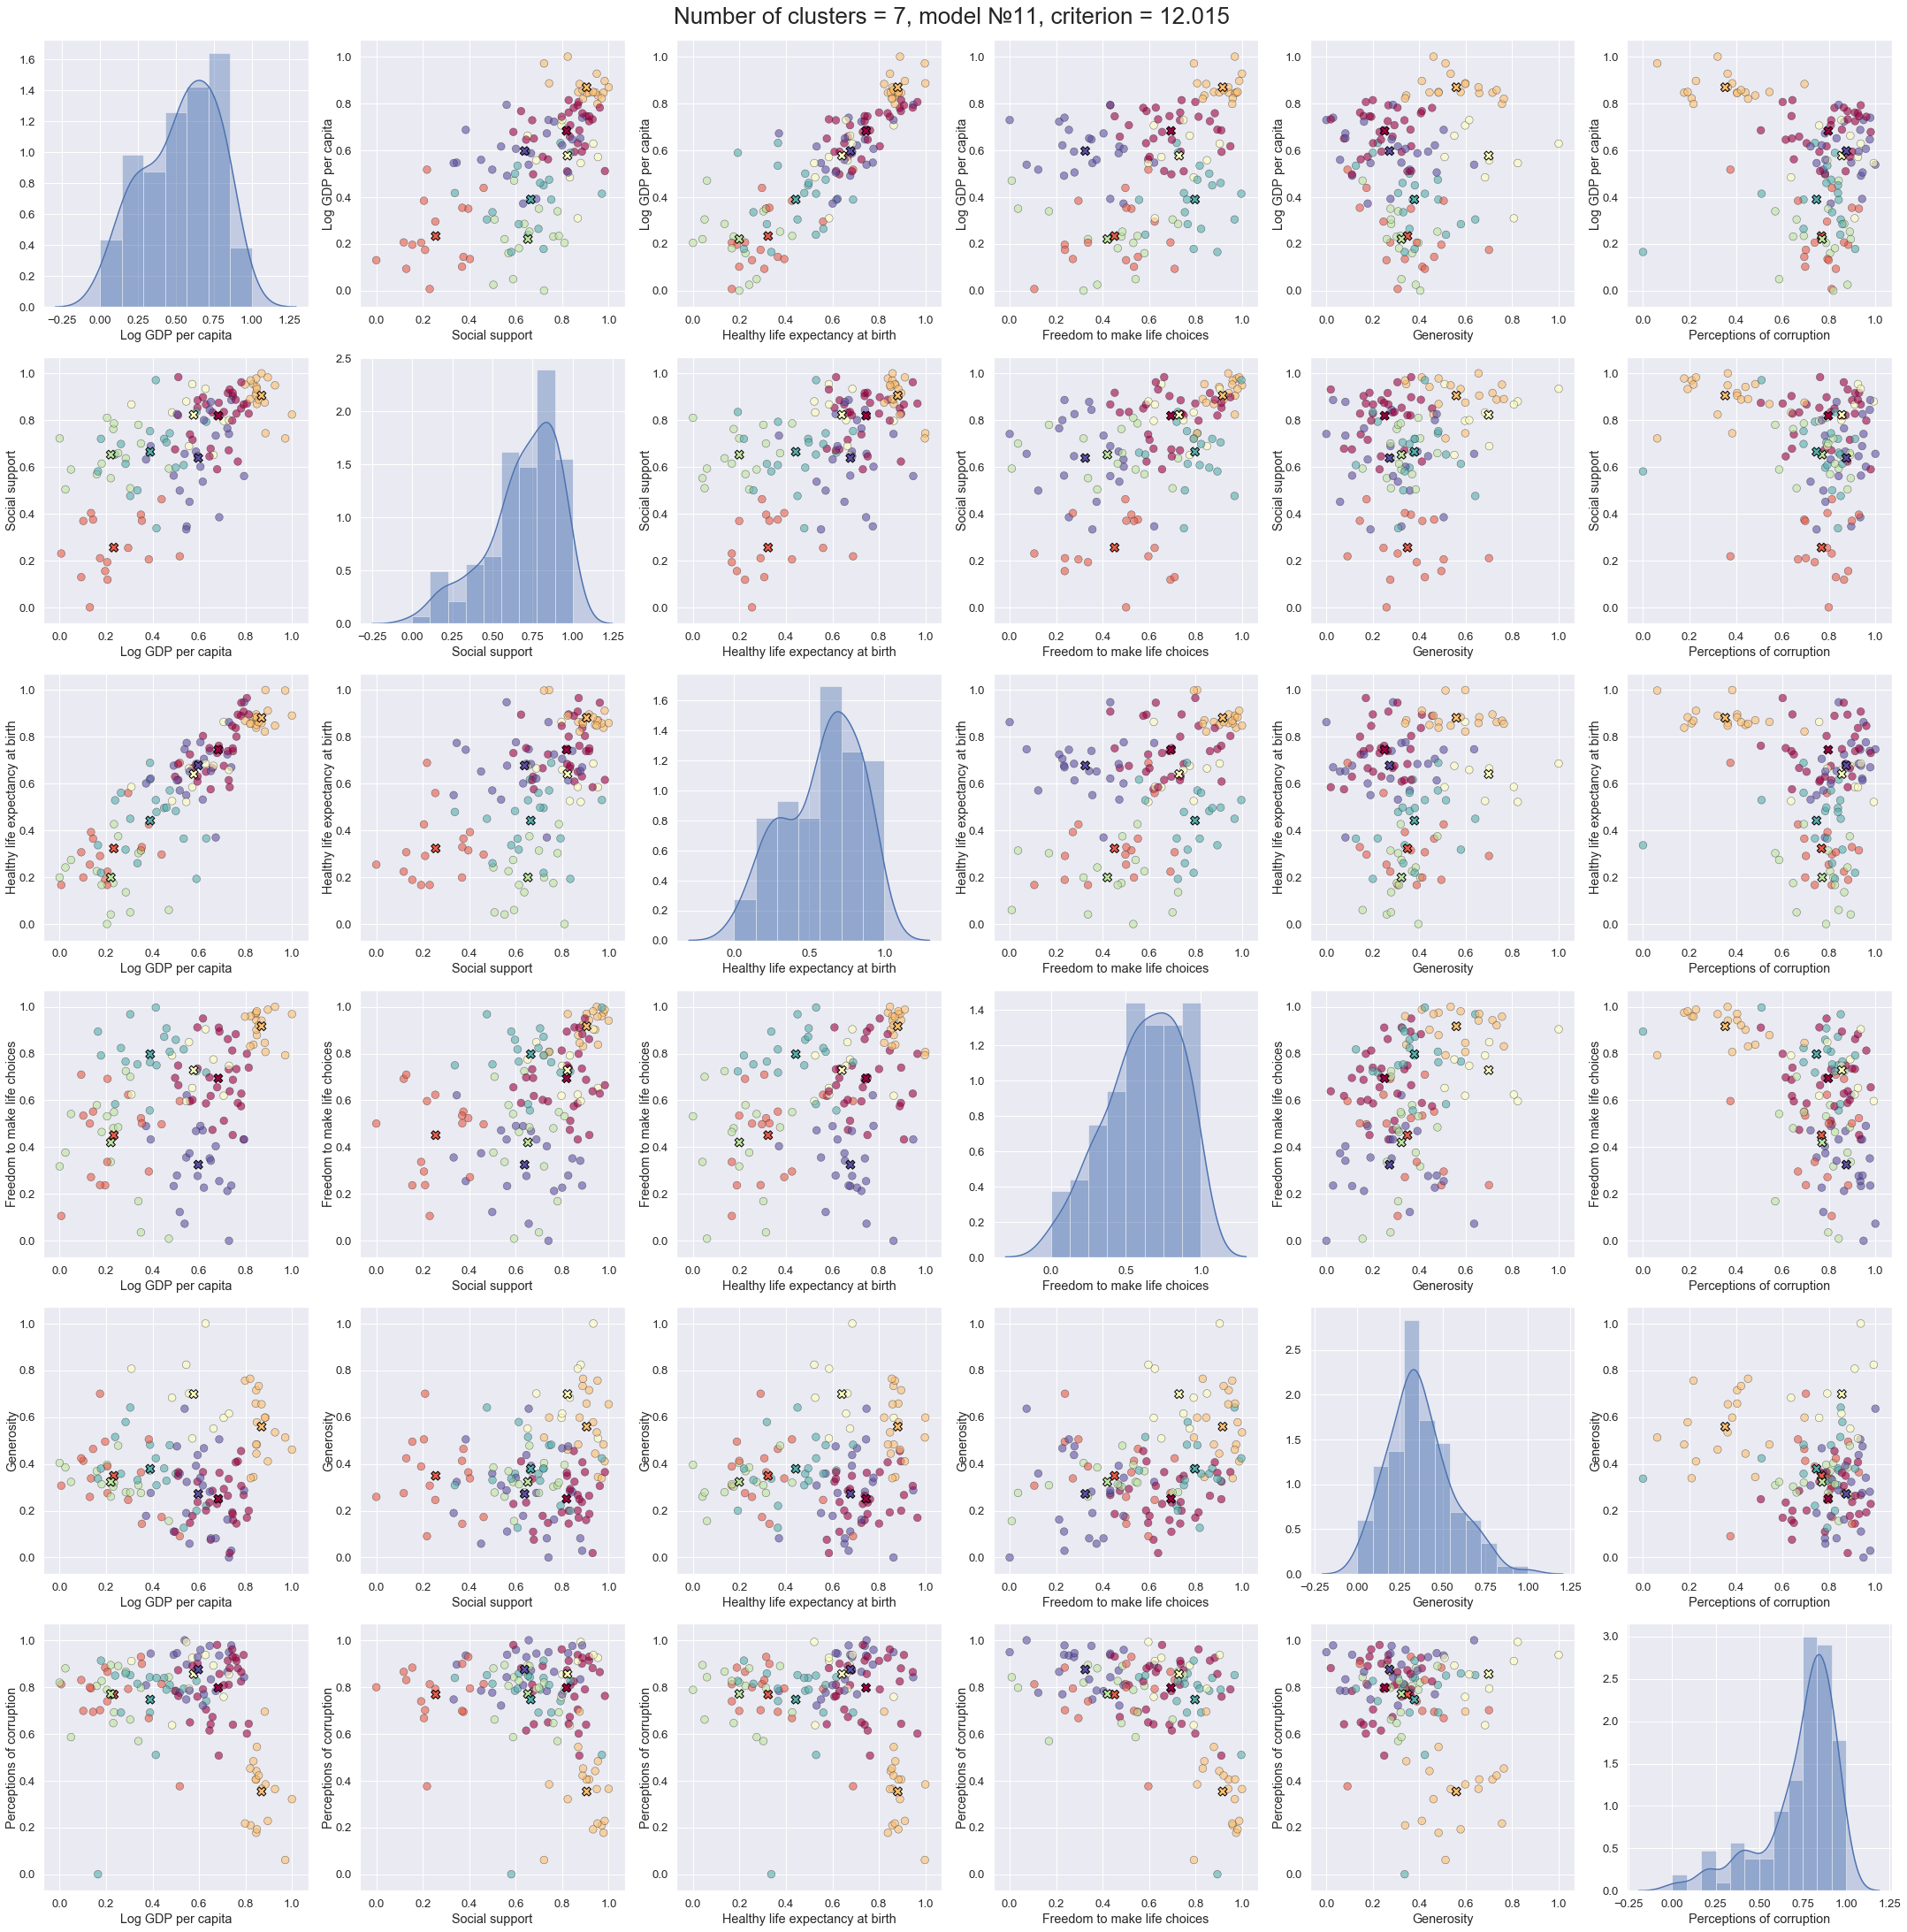

In [10]:
for i, idx in enumerate(best_models):
    pairplot_cluster(df_2014_std, 
                     best_models[idx].fit_predict(df_2014_std),
                     best_models[idx].cluster_centers_,
                     best_iter[idx],
                     idx,
                     best_models[idx].inertia_);
    plt.tight_layout()
    plt.savefig('./img/pairplot_{0}_clusters.png'.format(idx), bbox_inches='tight', pad_inches=1)

#### Cluster centers:

In [11]:
centers = dict([(5,[]), (7,[])])
for idx, model in best_models.items():
    centers[idx] = pd.DataFrame(model.cluster_centers_.T.round(3), index=np.array(list((map(str, df_2014.columns)))).reshape(-1, 1), columns=[x for x in range(0, idx)])
    display(centers[idx])

,0,1,2,3,4
"(Log GDP per capita,)",0.407,0.681,0.869,0.593,0.217
"(Social support,)",0.706,0.817,0.905,0.620,0.444
"(Healthy life expectancy at birth,)",0.474,0.739,0.881,0.678,0.243
"(Freedom to make life choices,)",0.778,0.695,0.917,0.337,0.427
"(Generosity,)",0.465,0.288,0.559,0.264,0.346
"(Perceptions of corruption,)",0.767,0.804,0.354,0.853,0.786


,0,1,2,3,4,5,6
"(Log GDP per capita,)",0.682,0.233,0.869,0.577,0.220,0.390,0.597
"(Social support,)",0.819,0.255,0.905,0.823,0.652,0.665,0.638
"(Healthy life expectancy at birth,)",0.745,0.323,0.881,0.641,0.199,0.442,0.678
"(Freedom to make life choices,)",0.694,0.451,0.917,0.729,0.420,0.798,0.325
"(Generosity,)",0.251,0.349,0.559,0.699,0.323,0.379,0.272
"(Perceptions of corruption,)",0.797,0.768,0.354,0.856,0.771,0.747,0.875


#### Cluster sizes:

In [12]:
for idx, model in best_models.items():
    counts = np.unique(model.labels_, return_counts=True)
    counts_df = pd.DataFrame(counts[1], index=counts[0], columns=['Cluster size'])
    display(counts_df.T)

,0,1,2,3,4
Cluster size,24,34,18,23,29


,0,1,2,3,4,5,6
Cluster size,30,16,18,9,15,18,22


#### Scaled data with cluster column and table of means:

In [13]:
mean_table = dict([(5,[]), (7,[])])
for N_clusters, model in best_models.items():
    feature_grand_means = df_2014_std.mean(axis=0)
    N_clust_df = df_2014_std.copy()
    N_clust_df = pd.concat((N_clust_df, pd.DataFrame(model.labels_.reshape((-1, 1)), columns=['cluster'])), axis=1)
    mean_table[N_clusters] = pd.concat((N_clust_df.groupby('cluster').mean(), pd.DataFrame(feature_grand_means, columns=['grand']).T),axis=0)
    display(mean_table[N_clusters].round(3))

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.407,0.706,0.474,0.778,0.465,0.767
1,0.681,0.817,0.739,0.695,0.288,0.804
2,0.869,0.905,0.881,0.917,0.559,0.354
3,0.593,0.620,0.678,0.337,0.264,0.853
4,0.217,0.444,0.243,0.427,0.346,0.786
grand,0.535,0.689,0.586,0.617,0.368,0.738


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.682,0.819,0.745,0.694,0.251,0.797
1,0.233,0.255,0.323,0.451,0.349,0.768
2,0.869,0.905,0.881,0.917,0.559,0.354
3,0.577,0.823,0.641,0.729,0.699,0.856
4,0.220,0.652,0.199,0.420,0.323,0.771
5,0.390,0.665,0.442,0.798,0.379,0.747
6,0.597,0.638,0.678,0.325,0.272,0.875
grand,0.535,0.689,0.586,0.617,0.368,0.738


#### Table of mean differences and their graphical representation:

,Log GDP per capita %,Social support %,Healthy life expectancy at birth %,Freedom to make life choices %,Generosity %,Perceptions of corruption %
0,-23.905,2.592,-19.135,26.178,26.293,3.841
1,27.211,18.598,26.118,12.671,-21.726,8.891
2,62.427,31.457,50.415,48.669,51.941,-52.108
3,10.89,-9.982,15.72,-45.343,-28.285,15.551
4,-59.503,-35.557,-58.545,-30.767,-6.094,6.407


,Log GDP per capita %,Social support %,Healthy life expectancy at birth %,Freedom to make life choices %,Generosity %,Perceptions of corruption %
0,27.551,18.911,27.097,12.58,-31.862,7.93
1,-56.42,-62.905,-44.839,-26.813,-5.144,4.041
2,62.427,31.457,50.415,48.669,51.941,-52.108
3,7.793,19.484,9.384,18.254,89.76,15.874
4,-58.835,-5.258,-65.996,-31.815,-12.186,4.386
5,-27.165,-3.461,-24.527,29.345,2.969,1.111
6,11.539,-7.33,15.636,-47.26,-26.149,18.489


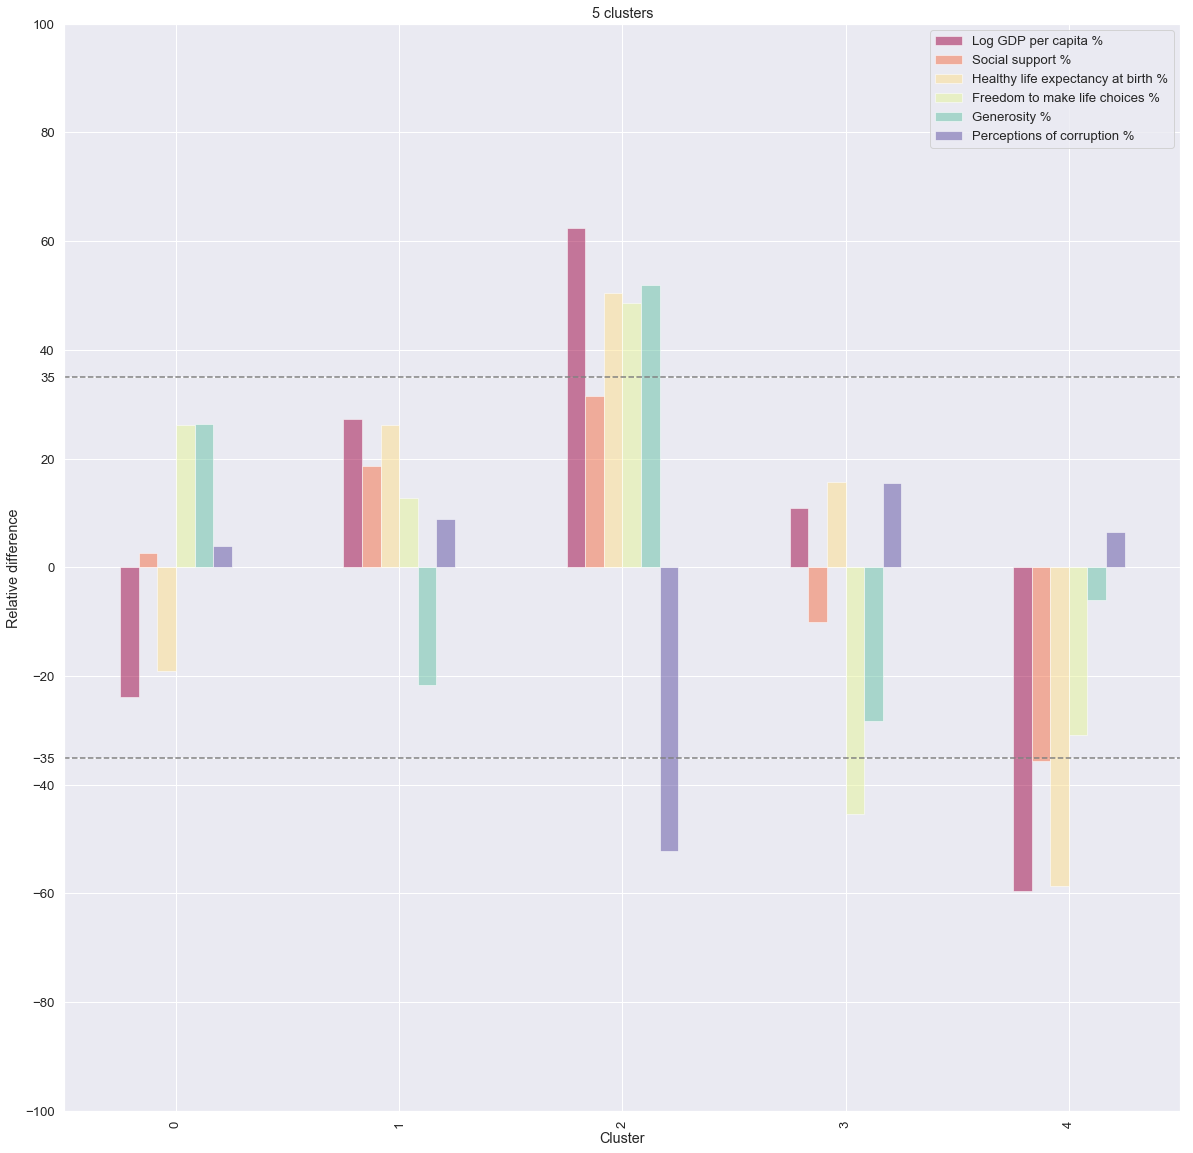

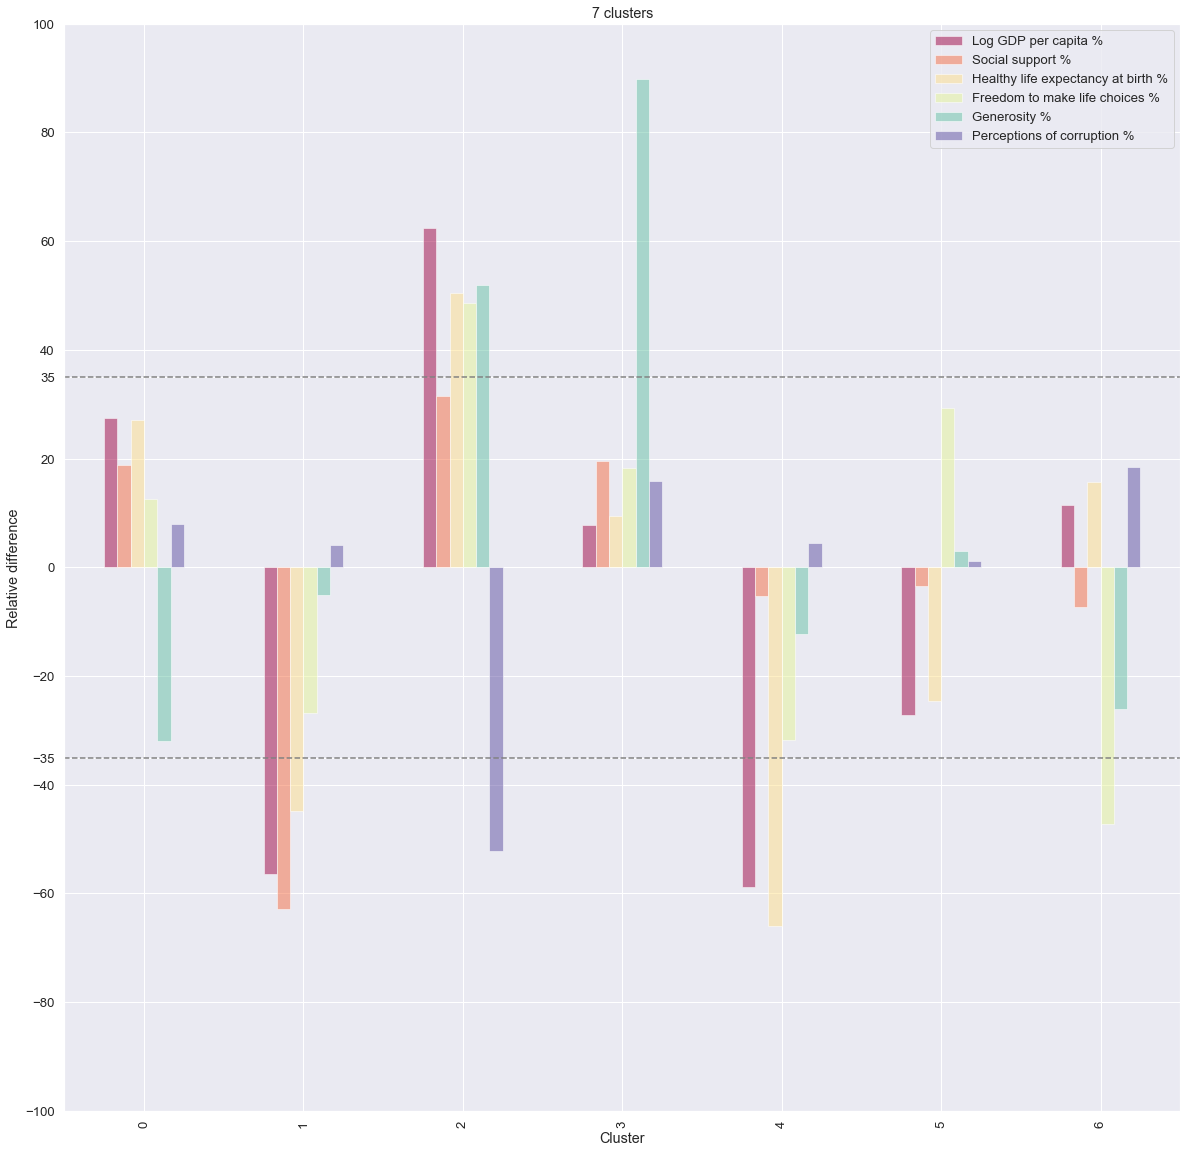

In [17]:
for N_clusters, model in best_models.items():
    diff = []
    for k in range(N_clusters):
        for v in range(N_features):
            diff.append(100 * (mean_table[N_clusters].iloc[k,v]/mean_table[N_clusters].iloc[N_clusters,v] - 1))
    diff_df = pd.DataFrame(np.asarray(diff).reshape((N_clusters, N_features)).round(3), columns=mean_table[N_clusters].columns + ' %')
    display(diff_df.style.set_caption('{} clusters'.format(N_clusters)))
    
    ax = diff_df.plot(kind='bar', figsize=(20, 20), alpha=.5, cmap=plt.cm.get_cmap('Spectral'))
    ax.axhline(35, c='gray', linestyle='--')
    ax.axhline(-35, c='gray', linestyle='--')
    ax.set_yticks([-100, -80, -60, -40, -35, -20, 0, 20, 35, 40, 60, 80, 100]);
    ax.set_title('{} clusters'.format(N_clusters))
    ax.set(xlabel='Cluster', ylabel='Relative difference');

### 5. Task
#### Compare average values of one feature in two clusters using bootstrap 

In [18]:
N_range = 5
ints = random.sample(range(0, N_clusters), 2)
ftr = random.sample(range(0, N_features), 1)[0]
display('Feature: %s' % N_clust_df.columns[ftr])

N_clust_df = df_2014_std.copy()
N_clust_df = pd.concat((N_clust_df, pd.DataFrame(best_models[7].labels_.reshape((-1, 1)), columns=['cluster'])), axis=1)
idx = 7
display(N_clust_df)

'Feature: Perceptions of corruption'

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,0.196,0.155,0.189,0.237,0.495,0.883,1
1,0.547,0.346,0.774,0.622,0.323,0.896,6
2,0.470,0.593,0.060,0.009,0.156,0.842,4
3,0.491,0.563,0.677,0.234,0.111,0.938,6
4,0.846,0.916,0.896,0.943,0.715,0.405,2
...,...,...,...,...,...,...,...
123,0.414,0.971,0.530,0.997,0.424,0.510,5
124,0.651,0.878,0.654,0.342,0.082,0.833,6
125,0.354,0.370,0.329,0.502,0.144,0.899,1
126,0.335,0.500,0.260,0.754,0.331,0.814,5


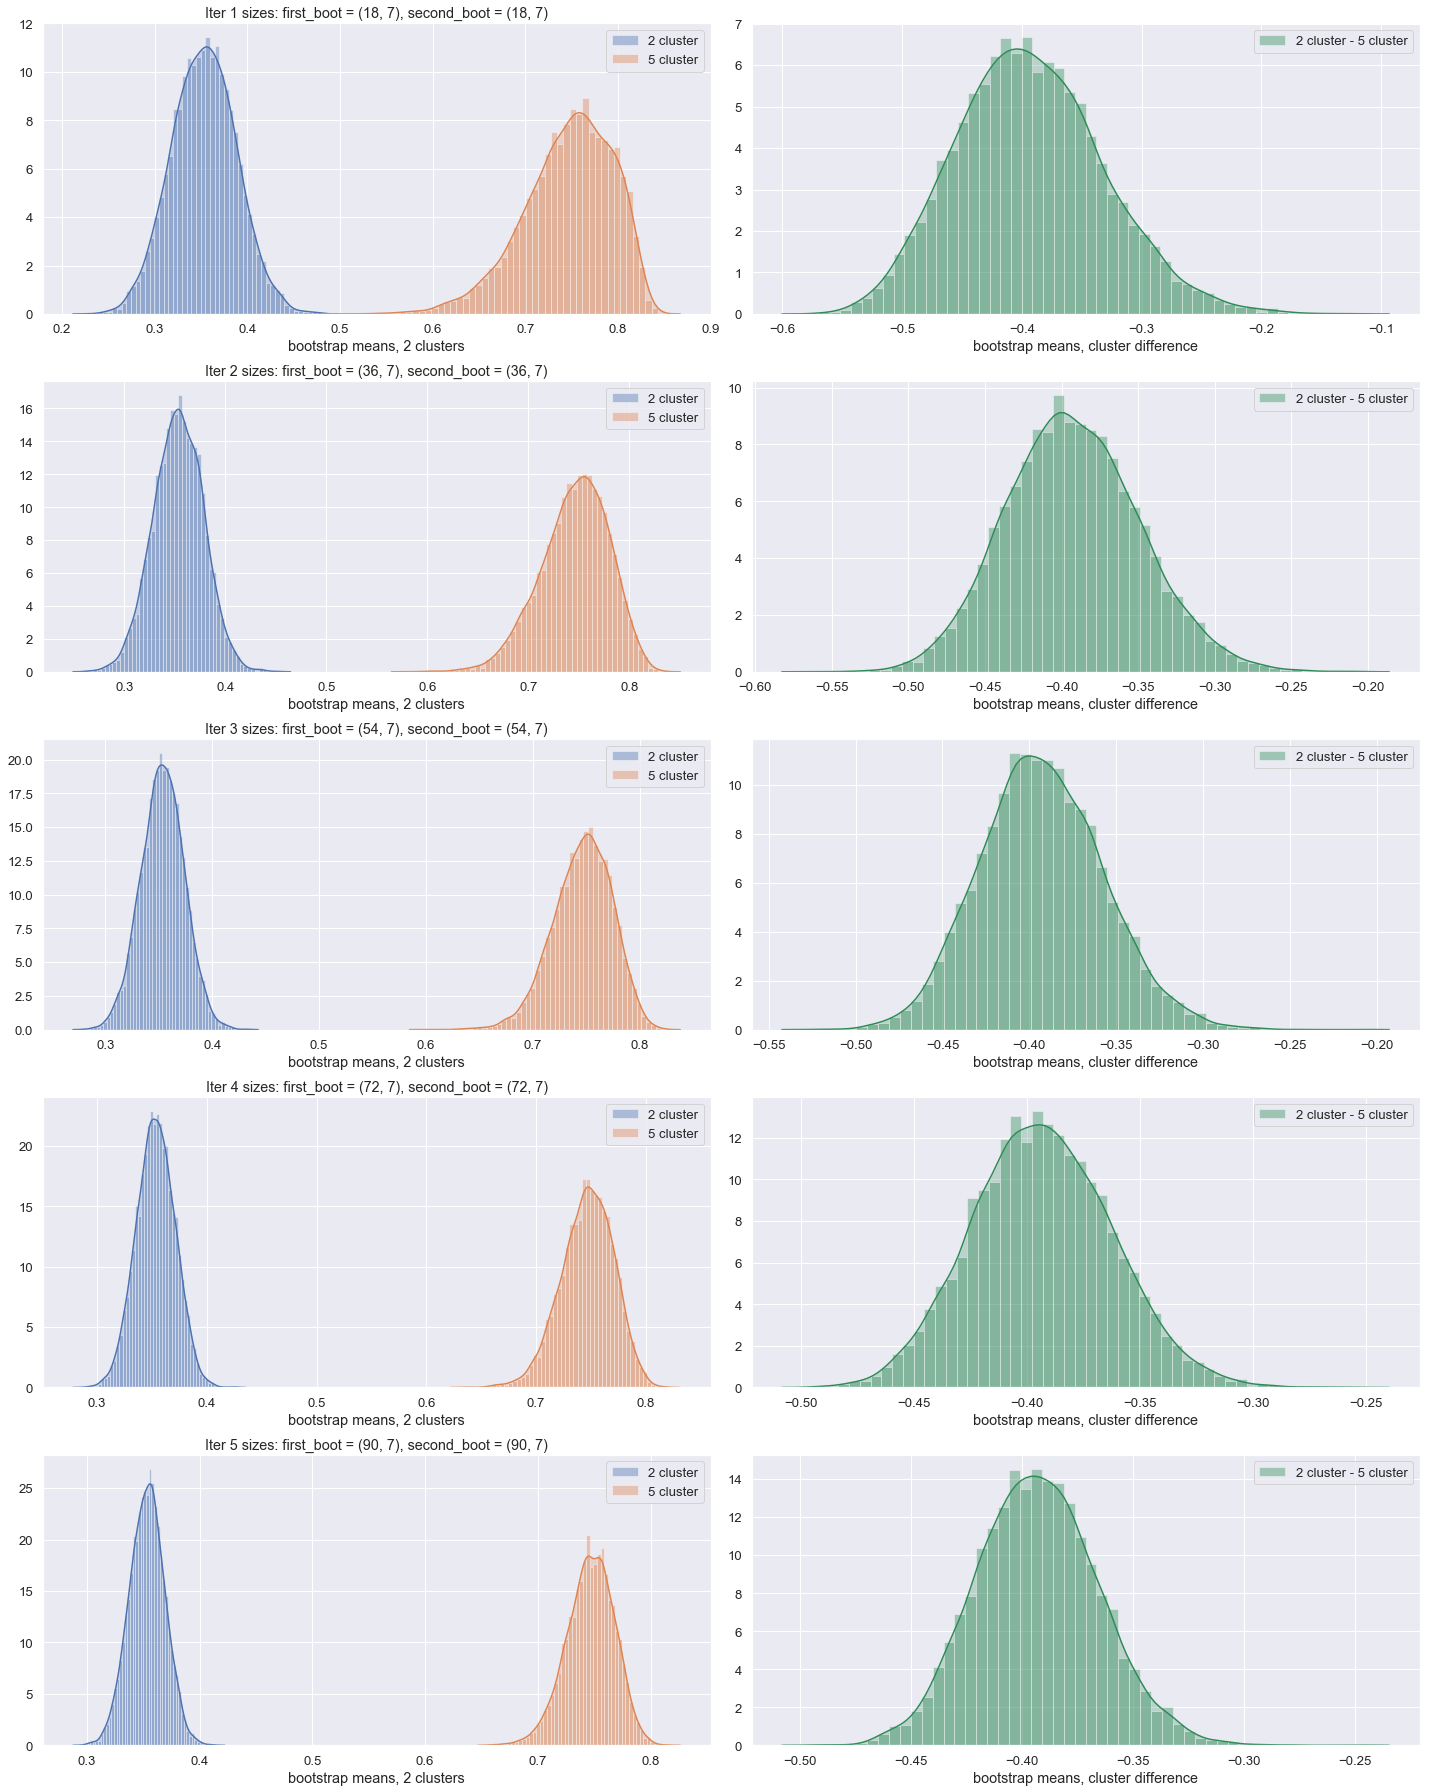

In [19]:
first_clust_df = N_clust_df[N_clust_df['cluster'] == ints[0]]
second_clust_df = N_clust_df[N_clust_df['cluster'] == ints[1]]

fig, axs = plt.subplots(nrows=N_range, ncols=2, figsize=(20, N_range * 5))

first_size_means, second_size_means = [], []
first_differences, second_differences = [], []
deviations = []

for j in range(N_range):
    first_means, second_means = [], []
    sizes = [(0,), (0,)]
    for i in range(10000):
        first_boot = resample(first_clust_df, replace=True, n_samples=first_clust_df.shape[0] * (j + 1), random_state=i)
        second_boot = resample(second_clust_df, replace=True, n_samples=second_clust_df.shape[0] * (j + 1), random_state=i)
        sizes[0] = first_boot.shape
        sizes[1] = second_boot.shape
        first_means.append(first_boot.iloc[:,ftr].mean())
        second_means.append(second_boot.iloc[:,ftr].mean())

    first_size_means.append(np.mean(first_means))
    second_size_means.append(np.mean(second_means))
    first_differences.append(np.mean(first_size_means[-1]) - np.mean(centers[idx].iloc[ftr,ints[0]]))
    second_differences.append(np.mean(second_size_means[-1]) - np.mean(centers[idx].iloc[ftr,ints[1]]))
    deviations.append(np.std(np.asarray(second_means) - np.asarray(first_means)))

    sns.distplot(first_means, kde_kws={"shade": True}, label= str(ints[0]) + ' cluster', ax=axs[j][0]);
    sns.distplot(second_means, kde_kws={"shade": True}, label = str(ints[1]) + ' cluster', axlabel='bootstrap means, 2 clusters', ax=axs[j][0]);
    sns.distplot(np.asarray(first_means) - np.asarray(second_means), kde_kws={"shade": True}, label = str(ints[0]) + ' cluster - ' + str(ints[1]) + ' cluster', axlabel='bootstrap means, cluster difference', color='seagreen', ax=axs[j][1]);
    axs[j][0].set_title('Iter {0} sizes: first_boot = {1}, second_boot = {2}'.format(j + 1, sizes[0], sizes[1]))
    axs[j][0].legend()
    axs[j][1].legend();
fig.tight_layout();

#### Boostrap means, absolute differences and sqrt of dispersion:

In [20]:
matrix = np.vstack((first_size_means, first_differences))
matrix = np.vstack((matrix, second_size_means))
matrix = np.vstack((matrix, second_differences))
matrix = np.vstack((matrix, deviations))

first_str_mean = 'bootstrap mean, cluster ' + str(ints[0])
first_str_diff = 'difference with center, cluster ' + str(ints[0])
second_str_mean = 'bootstrap mean, cluster ' + str(ints[1])
second_str_diff = 'difference with center, cluster ' + str(ints[1])

display(pd.DataFrame(matrix, index=[first_str_mean, first_str_diff, second_str_mean, second_str_diff, 'std (sqrt of dispersion)'], columns= [str(x) + 'n' for x in range(1, N_range + 1)]))

,1n,2n,3n,4n,5n
"bootstrap mean, cluster 2",0.353384,0.353556,0.353568,0.353469,0.353502
"difference with center, cluster 2",-0.000616,-0.000444,-0.000432,-0.000531,-0.000498
"bootstrap mean, cluster 5",0.746487,0.746091,0.746430,0.746553,0.746539
"difference with center, cluster 5",-0.000513,-0.000909,-0.000570,-0.000447,-0.000461
std (sqrt of dispersion),0.061421,0.043383,0.035337,0.030816,0.027412
